### Import Libraries

---



In [ ]:
# Importing libraries:
import pandas as pd
import numpy as np
import math
import subprocess
import matplotlib.pyplot as plt
import seaborn as sns
import json
import warnings

### Kaggle Datasets Keys


---



In [ ]:
# Kaggle Package
!pip install kaggle

# Kaggle Credentials
kaggle_credentials = {
    "username": *********, #Add your Kaggle username
    "key": *************** #Add your Kaggle key
}
# Save credentials to a file named kaggle.json
with open('kaggle.json', 'w') as file:
    json.dump(kaggle_credentials, file)

In [ ]:
# Move the uploaded kaggle.json file to the appropriate directory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Download the dataset using the Kaggle API command
!kaggle datasets download -d juanmah/world-cities

world-cities.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# Unzip the downloaded dataset
import zipfile
with zipfile.ZipFile("world-cities.zip", "r") as zip_ref:
    zip_ref.extractall("world-cities")

In [ ]:
# Display settings:
pd.set_option('display.max_columns', None) # display all columns
warnings.filterwarnings('ignore') # ignore warnings
pd.set_option('display.max_rows', None)
pd.reset_option('display.max_rows')

In [ ]:
# Download the World Country Dataset using the Kaggle API command
!kaggle datasets download -d nelgiriyewithana/countries-of-the-world-2023

# Unzip the downloaded dataset
import zipfile

with zipfile.ZipFile("countries-of-the-world-2023.zip", "r") as zip_ref:
    zip_ref.extractall("countries-of-the-world-2023")

countries-of-the-world-2023.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# Upload a file Cities
from google.colab import files

uploaded = files.upload()

# Print the uploaded file(s)
for filename in uploaded.keys():
    print(f"Uploaded file: {filename}")

Saving worldcities.csv (2).zip to worldcities.csv (2).zip
Uploaded file: worldcities.csv (2).zip


In [ ]:
# Upload a file World
from google.colab import files

uploaded = files.upload()

# Print the uploaded file(s)
for filename in uploaded.keys():
    print(f"Uploaded file: {filename}")

Saving world-data-2023 (1).csv to world-data-2023 (1) (1).csv
Uploaded file: world-data-2023 (1) (1).csv


In [ ]:
# Specify the file name
file_name_countries = "world-data-2023 (1).csv"

# Load the dataset into a DataFrame
world_country_df = pd.read_csv(file_name_countries)

# Display the first few rows of the DataFrame
world_country_df.head()

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,CPI,CPI Change (%),Currency-Code,Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Largest city,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",149.9,2.30%,AFN,4.47,2.10%,$0.70,"$19,101,353,833",104.00%,9.70%,47.9,Kabul,64.5,638.0,$0.43,Pashto,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",119.05,1.40%,ALL,1.62,28.10%,$1.36,"$15,278,077,447",107.00%,55.00%,7.8,Tirana,78.5,15.0,$1.12,Albanian,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",151.36,2.00%,DZD,3.02,0.80%,$0.28,"$169,988,236,398",109.90%,51.40%,20.1,Algiers,76.7,112.0,$0.95,Arabic,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,NaN,NaN,EUR,1.27,34.00%,$1.51,"$3,154,057,987",106.40%,NaN,2.7,Andorra la Vella,NaN,NaN,$6.63,Catalan,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",261.73,17.10%,AOA,5.52,46.30%,$0.97,"$94,635,415,870",113.50%,9.30%,51.6,Luanda,60.8,241.0,$0.71,Portuguese,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887


## Datasets

### World Cities Database Cleaning


---



In [ ]:
# Load the dataset into a DataFrame
world_cities_df = pd.read_csv("world-cities/worldcities.csv")

# Display World Cities info
world_cities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47868 entries, 0 to 47867
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        47868 non-null  object 
 1   city_ascii  47867 non-null  object 
 2   lat         47868 non-null  float64
 3   lng         47868 non-null  float64
 4   country     47868 non-null  object 
 5   iso2        47835 non-null  object 
 6   iso3        47868 non-null  object 
 7   admin_name  47671 non-null  object 
 8   capital     13023 non-null  object 
 9   population  47656 non-null  float64
 10  id          47868 non-null  int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 4.0+ MB


In [ ]:
# Rename [city_ascii] column to [city_name] and [lng] to [lon]
world_cities_df.rename(columns={'city_ascii': 'city_name', 'lng': 'lon'}, inplace=True)

In [ ]:
# Create a World Cities DataFrame only for (lon & lat)
lon_lat_world_cities_df = world_cities_df[['city_name', 'lon', 'lat', 'country', 'population', 'id']]

In [ ]:
# Filter the DataFrame for the three cities we opearte (Gurgaon, Hyderabad, and Manila)
gurg_hyde_mani_df = lon_lat_world_cities_df[
    lon_lat_world_cities_df['city_name'].isin(['Gurgaon', 'Hyderabad', 'Manila'])
]

print(gurg_hyde_mani_df)

     city_name       lon      lat      country  population          id
5       Manila  120.9772  14.5958  Philippines  24922000.0  1608618140
39   Hyderabad   78.4747  17.3617        India  10494000.0  1356871768
878    Gurgaon   77.0290  28.4560        India    876824.0  1356836043


### Labour Costs Dataset Cleaning


---



In [ ]:
world_country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density
(P/Km2)                            195 non-null    object 
 2   Abbreviation                               188 non-null    object 
 3   Agricultural Land( %)                      188 non-null    object 
 4   Land Area(Km2)                             194 non-null    object 
 5   Armed Forces size                          171 non-null    object 
 6   Birth Rate                                 189 non-null    float64
 7   Calling Code                               194 non-null    float64
 8   Capital/Major City                         192 non-null    object 
 9   Co2-Emissions                              188 non-null    object 
 10  CPI                       

In [ ]:
# Creating new DataFrame with labour costs related columns only:
labour_costs_country_df = world_country_df[['Country', 'Abbreviation', 'Capital/Major City', 'Minimum wage', 'Population', 'Population: Labor force participation (%)', 'Unemployment rate', 'Gross primary education enrollment (%)', 'Gross tertiary education enrollment (%)', 'Physicians per thousand','Density\n(P/Km2)']].copy()

# Display new Labour costs DataFrame
labour_costs_country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Abbreviation                               188 non-null    object 
 2   Capital/Major City                         192 non-null    object 
 3   Minimum wage                               150 non-null    object 
 4   Population                                 194 non-null    object 
 5   Population: Labor force participation (%)  176 non-null    object 
 6   Unemployment rate                          176 non-null    object 
 7   Gross primary education enrollment (%)     188 non-null    object 
 8   Gross tertiary education enrollment (%)    183 non-null    object 
 9   Physicians per thousand                    188 non-null    float64
 10  Density
(P/Km2)           

In [ ]:
# Labour costs df info:
labour_costs_country_df.head()

,Country,Abbreviation,Capital/Major City,Minimum wage,Population,Population: Labor force participation (%),Unemployment rate,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Physicians per thousand,Density\n(P/Km2)
0,Afghanistan,AF,Kabul,$0.43,"38,041,754",48.90%,11.12%,104.00%,9.70%,0.28,60
1,Albania,AL,Tirana,$1.12,"2,854,191",55.70%,12.33%,107.00%,55.00%,1.20,105
2,Algeria,DZ,Algiers,$0.95,"43,053,054",41.20%,11.70%,109.90%,51.40%,1.72,18
3,Andorra,AD,Andorra la Vella,$6.63,"77,142",NaN,NaN,106.40%,NaN,3.33,164
4,Angola,AO,Luanda,$0.71,"31,825,295",77.50%,6.89%,113.50%,9.30%,0.21,26


In [ ]:
# The main columns to asses labour costs are: Minimum wage, Unemployment rate, and Gross primary education enrollment (%)
# So we'll create a new df dropping rows with null values on those columns

labour_costs_no_nulls_df = labour_costs_country_df.dropna(subset=['Minimum wage', 'Unemployment rate', 'Gross primary education enrollment (%)'])
labour_costs_no_nulls_df = labour_costs_no_nulls_df.reset_index(drop=True)
labour_costs_no_nulls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    141 non-null    object 
 1   Abbreviation                               139 non-null    object 
 2   Capital/Major City                         140 non-null    object 
 3   Minimum wage                               141 non-null    object 
 4   Population                                 141 non-null    object 
 5   Population: Labor force participation (%)  141 non-null    object 
 6   Unemployment rate                          141 non-null    object 
 7   Gross primary education enrollment (%)     141 non-null    object 
 8   Gross tertiary education enrollment (%)    139 non-null    object 
 9   Physicians per thousand                    141 non-null    float64
 10  Density
(P/Km2)           

In [ ]:
# Sorting [Minimum wage]& [Unemployment rate] as default (low to high) and [Gross primary education] from high to low:
sorted_labour_costs_no_nulls_df = labour_costs_no_nulls_df.sort_values(by=['Minimum wage', 'Unemployment rate', 'Gross primary education enrollment (%)'], ascending=[True, True, False])
sorted_labour_costs_no_nulls_df.head()

,Country,Abbreviation,Capital/Major City,Minimum wage,Population,Population: Labor force participation (%),Unemployment rate,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Physicians per thousand,Density\n(P/Km2)
131,Uganda,UG,Kampala,$0.01,"44,269,594",70.30%,1.84%,102.70%,4.80%,0.17,229
138,Venezuela,VE,Caracas,$0.01,"28,515,829",59.70%,8.80%,97.20%,79.30%,1.92,32
34,Cuba,CU,Havana,$0.05,"11,333,483",53.60%,1.64%,101.90%,41.40%,8.42,106
46,Georgia,GE,Tbilisi,$0.05,"3,720,382",68.30%,14.40%,98.60%,63.90%,7.12,57
123,Tanzania,TZ,Dodoma,$0.09,"58,005,463",83.40%,1.98%,94.20%,4.00%,0.01,67


In [ ]:
# Improving labour cost table columns order:
desired_columns_visualization = ['Country', 'Abbreviation', 'Capital/Major City', 'Population',
                   'Minimum wage', 'Unemployment rate', 'Gross primary education enrollment (%)',
                   'Population: Labor force participation (%)',
                   'Gross tertiary education enrollment (%)', 'Physicians per thousand',
                   'Density\n(P/Km2)']

sorted_labour_costs_no_nulls_df = sorted_labour_costs_no_nulls_df.reindex(columns=desired_columns_visualization)
sorted_labour_costs_no_nulls_df.head()

,Country,Abbreviation,Capital/Major City,Population,Minimum wage,Unemployment rate,Gross primary education enrollment (%),Population: Labor force participation (%),Gross tertiary education enrollment (%),Physicians per thousand,Density\n(P/Km2)
131,Uganda,UG,Kampala,"44,269,594",$0.01,1.84%,102.70%,70.30%,4.80%,0.17,229
138,Venezuela,VE,Caracas,"28,515,829",$0.01,8.80%,97.20%,59.70%,79.30%,1.92,32
34,Cuba,CU,Havana,"11,333,483",$0.05,1.64%,101.90%,53.60%,41.40%,8.42,106
46,Georgia,GE,Tbilisi,"3,720,382",$0.05,14.40%,98.60%,68.30%,63.90%,7.12,57
123,Tanzania,TZ,Dodoma,"58,005,463",$0.09,1.98%,94.20%,83.40%,4.00%,0.01,67


In [ ]:
# Remove '$' and convert to numeric 'Minimum wage' column
sorted_labour_costs_no_nulls_df['Minimum wage'] = sorted_labour_costs_no_nulls_df['Minimum wage'].str.replace('$', '').astype(float)

# Remove '%' and convert to numeric 'Unemployment rate' column
sorted_labour_costs_no_nulls_df['Unemployment rate'] = sorted_labour_costs_no_nulls_df['Unemployment rate'].str.replace('%', '').astype(float)

# Remove '%' and convert to numeric for 'Gross primary education enrollment (%)' column
sorted_labour_costs_no_nulls_df['Gross primary education enrollment (%)'] = sorted_labour_costs_no_nulls_df['Gross primary education enrollment (%)'].str.replace('%', '').astype(float)

## Hypothesis 1:

**Approach**: What's the air quality of where we currently operate?

**Hypothesis 1**: The air quality in cities where we currently operate (Gurgaon, Hyderabad, and Manila) is significantly poor, suggesting the need to explore alternative locations with better air quality.


---



### Air Quality History Function



In [ ]:
# Air Quality History API command and Function:
import requests

def get_air_quality_info(city_name, lon, lat):
    url = "https://air-quality.p.rapidapi.com/history/airquality"
    querystring = {"lon": lon, "lat": lat}
    headers = {
        "X-RapidAPI-Key": [API Key], #Add your API Key
        "X-RapidAPI-Host": [API Host] #Add your API Host
    }

    response = requests.get(url, headers=headers, params=querystring)
    airq_data = response.json()

    city_name = airq_data['city_name']
    country_code = airq_data['country_code']
    lon = airq_data['lon']
    lat = airq_data['lat']
    aqi = airq_data['data'][0]['aqi']
    pm25 = airq_data['data'][0]['pm25']
    o3 = airq_data['data'][0]['o3']

    print(f"City Name: {city_name}")
    print(f"Country Code: {country_code}")
    print(f"Longitude: {lon}")
    print(f"Latitude: {lat}")

    # Map AQI levels to descriptions
    aqi_description = get_air_quality_description('AQI', aqi)
    print(f"\nAQI: {aqi} - {aqi_description}")

    # Map PM2.5 levels to descriptions
    pm25_description = get_air_quality_description('PM2.5', pm25)
    print(f"PM2.5: {pm25} - {pm25_description}")

    # Map O3 levels to descriptions
    o3_description = get_air_quality_description('O3', o3)
    print(f"O3: {o3} - {o3_description}")

def get_air_quality_description(parameter, level):
    if parameter == 'AQI':
        if level <= 50:
            return 'Good'
        elif 51 <= level <= 100:
            return 'Moderate'
        elif 101 <= level <= 150:
            return 'Unhealthy'
        elif level >= 151:
            return 'Dangerous'
    elif parameter == 'PM2.5':
        if level <= 12:
            return 'Good'
        elif 12.1 <= level <= 35.4:
            return 'Moderate'
        elif 35.5 <= level <= 55.4:
            return 'Unhealthy'
        elif level >= 55.5:
            return 'Dangerous'
    elif parameter == 'O3':
        if level <= 54:
            return 'Good'
        elif 55 <= level <= 70:
            return 'Moderate'
        elif 71 <= level <= 105:
            return 'Unhealthy'
        elif level >= 106:
            return 'Dangerous'
    return 'Unknown'

In [ ]:
# Get Air Quality History for Gurgaon
get_air_quality_info("Gurgaon", "77.0290", "28.4560")

City Name: Gurgaon
Country Code: IN
Longitude: 77.029
Latitude: 28.456

AQI: 217 - Dangerous
PM2.5: 21 - Moderate
O3: 23.7 - Good


In [ ]:
# Get Air Quality History for Hyderabad
get_air_quality_info("Hyderabad", "78.4747", "17.3617")

City Name: Hyderabad
Country Code: IN
Longitude: 78.4747
Latitude: 17.3617

AQI: 152 - Dangerous
PM2.5: 57 - Dangerous
O3: 100.3 - Unhealthy


In [ ]:
# Get Air Quality History for Manila
get_air_quality_info("Manila", "120.9772", "14.5958") # Quiapo is a district of Manila (so same place pulled by API)

City Name: Quiapo
Country Code: PH
Longitude: 120.9772
Latitude: 14.5958

AQI: 67 - Moderate
PM2.5: 20 - Moderate
O3: 31 - Good


### Current Air Quaility Function

In [ ]:
def get_current_air_quality_info(city_name, lon, lat):
    url = "https://air-quality.p.rapidapi.com/current/airquality"
    querystring = {"lon": lon, "lat": lat}
    headers = {
        "X-RapidAPI-Key": [API Key], #Add your API Key
        "X-RapidAPI-Host": [API Host] #Add your API Host
    }

    response = requests.get(url, headers=headers, params=querystring)
    airq_data = response.json()

    city_name = airq_data['city_name']
    country_code = airq_data['country_code']
    lon = airq_data['lon']
    lat = airq_data['lat']
    aqi = airq_data['data'][0]['aqi']
    pm25 = airq_data['data'][0]['pm25']
    o3 = airq_data['data'][0]['o3']

    print(f"City Name: {city_name}")
    print(f"Country Code: {country_code}")
    print(f"Longitude: {lon}")
    print(f"Latitude: {lat}")

    # Map AQI levels to descriptions
    aqi_description = get_air_quality_description('AQI', aqi)
    print(f"\nAQI: {aqi} - {aqi_description}")

    # Map PM2.5 levels to descriptions
    pm25_description = get_air_quality_description('PM2.5', pm25)
    print(f"PM2.5: {pm25} - {pm25_description}")

    # Map O3 levels to descriptions
    o3_description = get_air_quality_description('O3', o3)
    print(f"O3: {o3} - {o3_description}")

In [ ]:
# Get Current Air Quality for Gurgaon
get_current_air_quality_info("Gurgaon", "77.0290", "28.4560")

City Name: Gurgaon
Country Code: IN
Longitude: 77.029
Latitude: 28.456

AQI: 167 - Dangerous
PM2.5: 68 - Dangerous
O3: 25 - Good


In [ ]:
# Get Current Air Quality for Hyderabad
get_current_air_quality_info("Hyderabad", "78.4747", "17.3617")

City Name: Hyderabad
Country Code: IN
Longitude: 78.4747
Latitude: 17.3617

AQI: 156 - Dangerous
PM2.5: 60 - Dangerous
O3: 83 - Unhealthy


In [ ]:
# Get Current Air Quality for Manila
get_current_air_quality_info("Manila", "120.9772", "14.5958") # Quiapo is a district of Manila (so same place pulled by API)

City Name: Quiapo
Country Code: PH
Longitude: 120.9772
Latitude: 14.5958

AQI: 110 - Unhealthy
PM2.5: 39 - Unhealthy
O3: 31 - Good


## Hypothesis 2:

**Approach**: Where could we go next?

**Hypothesis 2**: It is possible to identify locations with labor costs comparable to or lower than our current operating locations (India and the Philippines) while also having better air quality. This would allow for potential expansion into new areas with improved working conditions without significantly increasing operational expenses.

### Average subset (IN,PHI)

In [ ]:
# Create India and Philippines subset with averages in key labour metrics:
in_phi_subset = sorted_labour_costs_no_nulls_df[sorted_labour_costs_no_nulls_df['Country'].isin(['India', 'Philippines'])][['Country', 'Minimum wage', 'Unemployment rate','Gross primary education enrollment (%)']]
in_phi_subset

,Country,Minimum wage,Unemployment rate,Gross primary education enrollment (%)
56,India,0.30,5.36,113.0
103,Philippines,1.12,2.15,107.5


In [ ]:
average_row = pd.Series({
    'Country': 'Average',
    'Minimum wage': in_phi_subset['Minimum wage'].mean(),
    'Unemployment rate': in_phi_subset['Unemployment rate'].mean(),
    'Gross primary education enrollment (%)': in_phi_subset['Gross primary education enrollment (%)'].mean()
})
average_row

Country                                   Average
Minimum wage                                 0.71
Unemployment rate                           3.755
Gross primary education enrollment (%)     110.25
dtype: object

In [ ]:
# Concat India/Phili subset with average serie:
average_in_phi_subset = pd.concat([in_phi_subset, pd.DataFrame(average_row).transpose()], ignore_index=True)
average_in_phi_subset

,Country,Minimum wage,Unemployment rate,Gross primary education enrollment (%)
0,India,0.3,5.36,113.0
1,Philippines,1.12,2.15,107.5
2,Average,0.71,3.755,110.25


### Scatter Plot Visualization

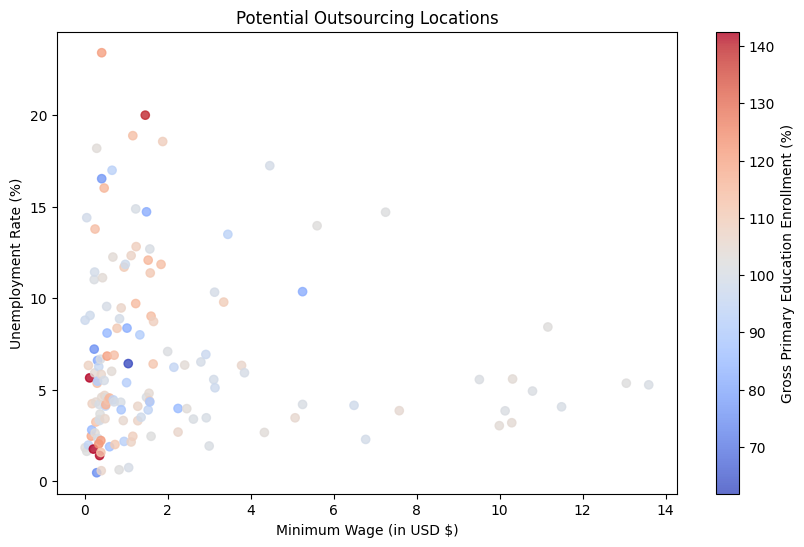

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(sorted_labour_costs_no_nulls_df['Minimum wage'], sorted_labour_costs_no_nulls_df['Unemployment rate'], c=sorted_labour_costs_no_nulls_df['Gross primary education enrollment (%)'], cmap='coolwarm', alpha=0.8)
plt.xlabel('Minimum Wage (in USD $)')
plt.ylabel('Unemployment Rate (%)')
plt.title('Potential Outsourcing Locations')
plt.colorbar(label='Gross Primary Education Enrollment (%)')
plt.show()

### List Potential Locations

In [ ]:
# Create a list of 'Potential Locations' by using filters on desired ratings:
potential_locations_df = sorted_labour_costs_no_nulls_df[
    (sorted_labour_costs_no_nulls_df['Minimum wage'] >= 0) &
    (sorted_labour_costs_no_nulls_df['Minimum wage'] <= 2) &
    (sorted_labour_costs_no_nulls_df['Unemployment rate'] >= 0) &
    (sorted_labour_costs_no_nulls_df['Unemployment rate'] <= 5) &
    (sorted_labour_costs_no_nulls_df['Gross primary education enrollment (%)'] > 110)
]

potential_locations_df

,Country,Abbreviation,Capital/Major City,Population,Minimum wage,Unemployment rate,Gross primary education enrollment (%),Population: Labor force participation (%),Gross tertiary education enrollment (%),Physicians per thousand,Density\n(P/Km2)
51,Guinea-Bissau,GW,Bissau,"1,920,922",0.16,2.47,118.7,72.00%,2.60%,0.13,70
77,Madagascar,MG,Antananarivo,"26,969,307",0.21,1.76,142.5,86.10%,5.40%,0.18,48
89,Mozambique,MZ,Maputo,"30,366,036",0.27,3.24,112.6,78.10%,7.30%,0.08,40
126,Togo,TG,Lom�,"8,082,366",0.34,2.04,123.8,77.60%,14.50%,0.08,152
91,Nepal,NP,Kathmandu,"28,608,710",0.36,1.41,142.1,83.80%,12.40%,0.75,203
90,Myanmar,MM,Naypyidaw,"54,045,420",0.39,1.58,112.3,61.70%,18.80%,0.68,83
14,Benin,BJ,Porto-Novo,"11,801,151",0.39,2.23,122.0,70.90%,12.30%,0.08,108
9,Bangladesh,BD,Dhaka,"167,310,838",0.51,4.19,116.5,59.00%,20.60%,0.58,"1,265"
113,Sierra Leone,SL,Freetown,"7,813,215",0.57,4.43,112.8,57.90%,2.00%,0.03,111
125,East Timor,TL,Dili,"3,500,000",0.60,4.55,115.3,67.30%,17.80%,0.72,89


In [ ]:
# Sorting [Potential locations] 'Min Wage' & 'Unemployment rate' (low to high) and 'Eductaion %' (high to low)
potential_locations_df.sort_values(by=['Minimum wage', 'Unemployment rate', 'Gross primary education enrollment (%)'], ascending=[True, True, False])
potential_locations_df = potential_locations_df.reset_index(drop=True)
potential_locations_df

,Country,Abbreviation,Capital/Major City,Population,Minimum wage,Unemployment rate,Gross primary education enrollment (%),Population: Labor force participation (%),Gross tertiary education enrollment (%),Physicians per thousand,Density\n(P/Km2)
0,Guinea-Bissau,GW,Bissau,"1,920,922",0.16,2.47,118.7,72.00%,2.60%,0.13,70
1,Madagascar,MG,Antananarivo,"26,969,307",0.21,1.76,142.5,86.10%,5.40%,0.18,48
2,Mozambique,MZ,Maputo,"30,366,036",0.27,3.24,112.6,78.10%,7.30%,0.08,40
3,Togo,TG,Lom�,"8,082,366",0.34,2.04,123.8,77.60%,14.50%,0.08,152
4,Nepal,NP,Kathmandu,"28,608,710",0.36,1.41,142.1,83.80%,12.40%,0.75,203
5,Myanmar,MM,Naypyidaw,"54,045,420",0.39,1.58,112.3,61.70%,18.80%,0.68,83
6,Benin,BJ,Porto-Novo,"11,801,151",0.39,2.23,122.0,70.90%,12.30%,0.08,108
7,Bangladesh,BD,Dhaka,"167,310,838",0.51,4.19,116.5,59.00%,20.60%,0.58,"1,265"
8,Sierra Leone,SL,Freetown,"7,813,215",0.57,4.43,112.8,57.90%,2.00%,0.03,111
9,East Timor,TL,Dili,"3,500,000",0.60,4.55,115.3,67.30%,17.80%,0.72,89


#### Scatter Plot Top 10 Locations

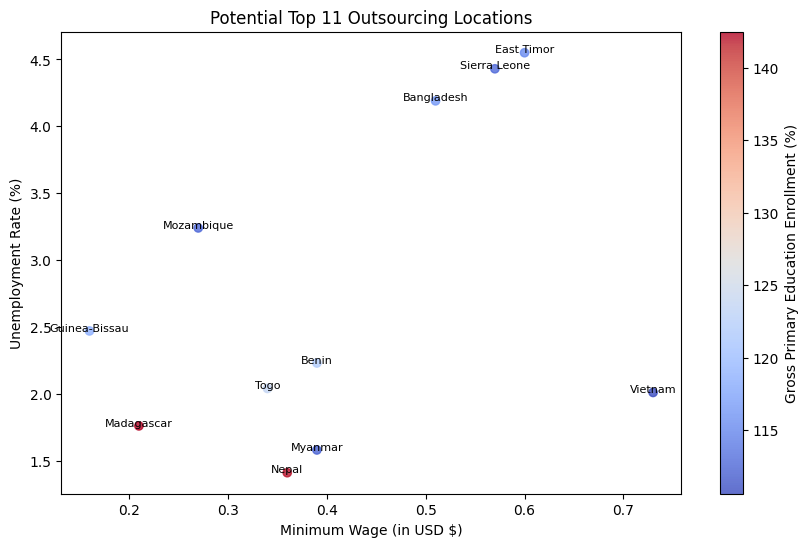

In [ ]:
plt.figure(figsize=(10, 6))

# Scatter plot structure:
plt.scatter(potential_locations_df['Minimum wage'],
            potential_locations_df['Unemployment rate'],
            c=potential_locations_df['Gross primary education enrollment (%)'],
            cmap='coolwarm',
            alpha=0.8)

# Display country names from Top 10 locations in 'Potential Locations' df:
for i, country in enumerate(potential_locations_df['Country']):
    plt.text(potential_locations_df['Minimum wage'][i],
             potential_locations_df['Unemployment rate'][i],
             country,
             fontsize=8,
             ha='center')

# Axes titles:
plt.xlabel('Minimum Wage (in USD $)')
plt.ylabel('Unemployment Rate (%)')
plt.title('Potential Top 11 Outsourcing Locations')
plt.colorbar(label='Gross Primary Education Enrollment (%)')

plt.show()

## Testing Final Results

###  Find (lon, lat) of Top Locations

**Top Locations Picked**:


*   Madagascar
*   Nepal
*   Togo
*   Guinea-Bissau

In [ ]:
# Top Locations picked: Madagascar, Nepal, Togo, Benim & Guinea-Bisau
# Myanmar nor Benim were in our capital city dataset so we ignored them
# Find the Major Capital cities
top_locations_subset = labour_costs_no_nulls_df[labour_costs_no_nulls_df['Country'].isin(['Madagascar', 'Nepal', 'Togo', 'Benim', 'Guinea-Bissau'])][['Country', 'Capital/Major City', 'Minimum wage', 'Unemployment rate','Gross primary education enrollment (%)']]
top_locations_subset

,Country,Capital/Major City,Minimum wage,Unemployment rate,Gross primary education enrollment (%)
51,Guinea-Bissau,Bissau,$0.16,2.47%,118.70%
77,Madagascar,Antananarivo,$0.21,1.76%,142.50%
91,Nepal,Kathmandu,$0.36,1.41%,142.10%
126,Togo,Lom�,$0.34,2.04%,123.80%


In [ ]:
# Sort values and reset index of the choosen subset:
top_locations_subset.sort_values(by=['Minimum wage', 'Unemployment rate', 'Gross primary education enrollment (%)'], ascending=[True, True, False])
top_locations_subset.reset_index(drop=True, inplace=True)
top_locations_subset

,Country,Capital/Major City,Minimum wage,Unemployment rate,Gross primary education enrollment (%)
0,Guinea-Bissau,Bissau,$0.16,2.47%,118.70%
1,Madagascar,Antananarivo,$0.21,1.76%,142.50%
2,Nepal,Kathmandu,$0.36,1.41%,142.10%
3,Togo,Lom�,$0.34,2.04%,123.80%


In [ ]:
# Filter (lon & lat) for Top 3 picks: [Antananarivo (MAD), Naypyidaw (MYA), and Kathmandu(NEP)]
lon_lat_top_locations_df = lon_lat_world_cities_df[
    lon_lat_world_cities_df['city_name'].isin(['Bissau', 'Antananarivo', 'Lome', 'Kathmandu'])]
lon_lat_top_locations_df

,city_name,lon,lat,country,population,id
361,Antananarivo,47.5250,-18.9100,Madagascar,2300000.0,1450978461
910,Kathmandu,85.3200,27.7100,Nepal,845767.0,1524589448
1503,Bissau,-15.5667,11.8500,Guinea-Bissau,492004.0,1624168850
16256,Lome,1.2228,6.1319,Togo,33000.0,1768409132


### Test Air Quality Top Locations

In [ ]:
# Get Current Air Quality for Bissau
get_current_air_quality_info("Bissau", "-15.5667", "11.8500")

City Name: Bissau
Country Code: GW
Longitude: -15.5667
Latitude: 11.85

AQI: 104 - Unhealthy
PM2.5: 37 - Unhealthy
O3: 103 - Unhealthy


In [ ]:
# Get Current Air Quality for Antananarivo
get_current_air_quality_info("Antananarivo", "47.5250", "-18.9100")

City Name: Antananarivo
Country Code: MG
Longitude: 47.525
Latitude: -18.91

AQI: 54 - Moderate
PM2.5: 14 - Moderate
O3: 39 - Good


In [ ]:
# Get Current Air Quality for Kathmandu
get_current_air_quality_info("Kathmandu", "85.3200", "27.7100")

City Name: Kathmandu
Country Code: NP
Longitude: 85.32
Latitude: 27.71

AQI: 161 - Dangerous
PM2.5: 64 - Dangerous
O3: 114 - Dangerous


In [ ]:
# Get Current Air Quality for Kathmandu
get_current_air_quality_info("Lome", "1.2228", "6.1319")

City Name: Lomé
Country Code: TG
Longitude: 1.2228
Latitude: 6.1319

AQI: 65 - Moderate
PM2.5: 19 - Moderate
O3: 50 - Good


## Demo

In [ ]:
# Step 1: Get country information
spain_results = labour_costs_no_nulls_df.loc[labour_costs_no_nulls_df['Country'] == 'Portugal',
                                             ['Country', 'Capital/Major City', 'Minimum wage',
                                              'Unemployment rate', 'Gross primary education enrollment (%)']]

spain_results

,Country,Capital/Major City,Minimum wage,Unemployment rate,Gross primary education enrollment (%)
105,Portugal,Lisbon,$3.78,6.33%,106.20%


In [ ]:
# Step 2: Get City lon & lat
lon_lat_top_locations_df = lon_lat_world_cities_df[
    lon_lat_world_cities_df['city_name'].isin(['Kampala'])][
    lon_lat_world_cities_df['country'].isin(['Uganda'])]
lon_lat_top_locations_df

,city_name,lon,lat,country,population,id
472,Kampala,32.5811,0.3136,Uganda,1680600.0,1800406299


In [ ]:
# Step 3.1: Get Air Quality History for 'city_name'
get_air_quality_info("city_name", "lon", "lat")

In [ ]:
# Step 3.2: Get Current Air Quality 'city_name'
get_current_air_quality_info("city_name", "lon", "lat")